In [1]:
import warnings
warnings.filterwarnings('ignore')
import itertools

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import rcParams
plt.style.use('fivethirtyeight')

import statsmodels.api as sm

In [2]:
df = pd.read_csv('zillow_data.csv')
df.head()
# zipcode is the RegionName

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
nj = df[df['State']=='NJ']
nj.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.0,302700.0,303800.0,...,1789100,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300
73,61148,8701,Lakewood,NJ,New York,Ocean,74,153800.0,153400.0,153000.0,...,400500,403900,408400,411000,412600,414000,415700,415600,413400,410700
158,61169,8753,Toms River,NJ,New York,Ocean,159,123400.0,123200.0,122900.0,...,258600,258700,259000,259500,261200,262500,262600,262400,263400,264300
187,60518,7002,Bayonne,NJ,New York,Hudson,188,145000.0,144500.0,143900.0,...,318500,324100,330900,339000,347400,352800,355900,361500,368700,372900
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1340200,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300


In [4]:
ny_metro = nj[nj['Metro']=='New York']
len(ny_metro)

361

In [5]:
# get the average prices of homes in the last year of sales
# last date of the data is showing to be 2018-04 therefore, we want from 2017-05 to 2018-04
# use .iloc[rows, columns] to select the columns we want
# .iloc[:(all rows), -12:(the last 12 columns)]
ny_metro['yearly average price'] = ny_metro.iloc[:, -12:].mean(axis=1) 
#default axis is index, but i want the columns
ny_metro.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,yearly average price
57,60545,7030,Hoboken,NJ,New York,Hudson,58,301600.0,302700.0,303800.0,...,1803000,1818100,1836900,1850100,1853500,1852200,1854400,1857600,1854300,1.821550e+06
73,61148,8701,Lakewood,NJ,New York,Ocean,74,153800.0,153400.0,153000.0,...,403900,408400,411000,412600,414000,415700,415600,413400,410700,4.086917e+05
158,61169,8753,Toms River,NJ,New York,Ocean,159,123400.0,123200.0,122900.0,...,258700,259000,259500,261200,262500,262600,262400,263400,264300,2.607583e+05
187,60518,7002,Bayonne,NJ,New York,Hudson,188,145000.0,144500.0,143900.0,...,324100,330900,339000,347400,352800,355900,361500,368700,372900,3.414250e+05
191,60639,7302,Jersey City,NJ,New York,Hudson,192,137200.0,137800.0,138500.0,...,1372300,1411000,1435900,1446300,1447800,1454900,1453900,1439500,1427300,1.404458e+06


In [6]:
new_df = ny_metro.drop(['RegionID', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], axis=1)

In [7]:
# get only zips that fall between 25% and 75%
display(new_df['yearly average price'].describe())
print(len(new_df))

count    3.610000e+02
mean     4.420354e+05
std      2.669593e+05
min      1.447917e+05
25%      2.799083e+05
50%      3.792917e+05
75%      5.322667e+05
max      3.013675e+06
Name: yearly average price, dtype: float64

361


In [8]:
avg_ny_metro = new_df[(new_df['yearly average price']>281519.4)&
                      (new_df['yearly average price']<532697.2)]
len(avg_ny_metro)

179

In [9]:
# how to calculate return on investment source:
# https://www.investopedia.com/terms/r/returnoninvestment.asp
# roi = (current listing - previous listing)/previous listing

avg_ny_metro['ROI'] = ((avg_ny_metro['2018-04']-avg_ny_metro['1996-04'])/avg_ny_metro['1996-04'])


In [10]:
avg_ny_metro.head()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,yearly average price,ROI
73,8701,153800.0,153400.0,153000.0,152500.0,152200.0,151900.0,151700.0,151700.0,151900.0,...,408400,411000,412600,414000,415700,415600,413400,410700,408691.666667,1.670351
187,7002,145000.0,144500.0,143900.0,143300.0,142800.0,142400.0,142100.0,142000.0,142100.0,...,330900,339000,347400,352800,355900,361500,368700,372900,341425.000000,1.571724
214,7093,131700.0,131900.0,132100.0,132300.0,132500.0,132700.0,133000.0,133500.0,134200.0,...,376800,386200,392900,395100,395500,399400,407000,412700,383350.000000,2.133637
278,8831,218500.0,217900.0,217100.0,216100.0,215200.0,214400.0,213900.0,213600.0,213800.0,...,433800,432100,432100,433000,434300,436000,436900,436500,434083.333333,0.997712
319,7087,127300.0,127000.0,126700.0,126400.0,126100.0,125900.0,125800.0,125800.0,126000.0,...,386000,394700,403700,410500,415500,424000,437400,448900,398000.000000,2.526316


In [11]:
# source:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
avg_ny_metro_sorted = avg_ny_metro.sort_values(by=['ROI'], ascending=False) #bigger values for ROI first

In [12]:
top_5_zips = avg_ny_metro_sorted[['RegionName', 'ROI']].head(5)
top_5_zips

,RegionName,ROI
9758,7756,4.418274
660,7306,3.896768
1737,7307,3.782152
319,7087,2.526316
4359,7719,2.252316


In [13]:
# reference the orginal data set to get the locations
# example: source: https://www.ritchieng.com/pandas-multi-criteria-filtering/
# filter_list = ['Crime', 'Drama', 'Action']
# movies[movies.genre.isin(filter_list)]
top_5 = ['7756', '7306', '7307', '7087', '7719']
top_5_zipcodes = nj[nj.RegionName.isin(top_5)]

In [14]:
top_5_zipcodes

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
319,60594,7087,Union City,NJ,New York,Hudson,320,127300.0,127000.0,126700.0,...,367000,377500,386000,394700,403700,410500,415500,424000,437400,448900
660,60643,7306,Jersey City,NJ,New York,Hudson,661,111400.0,111100.0,110900.0,...,465400,469800,475900,484000,495800,506700,510000,515300,531900,545500
1737,60644,7307,Jersey City,NJ,New York,Hudson,1738,114300.0,114300.0,114400.0,...,439500,449000,458300,468100,478200,487300,496000,510600,531900,546600
4359,60768,7719,Wall,NJ,New York,Monmouth,4360,140300.0,140300.0,140200.0,...,436600,437700,438300,438400,439700,444100,448900,452300,454700,456300
9758,60796,7756,Neptune,NJ,New York,Monmouth,9759,98500.0,99100.0,99600.0,...,498200,505000,510500,515800,521300,524200,528100,533300,535100,533700


In [15]:
# source: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html
NJ_top_5 = pd.melt(top_5_zipcodes, id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 
                                      'CountyName', 'SizeRank'], var_name='Date')
NJ_top_5['Date'] = pd.to_datetime(NJ_top_5['Date'], infer_datetime_format=True)
NJ_top_5 = NJ_top_5.dropna(subset=['value'])

In [16]:
display(NJ_top_5.head())
display(NJ_top_5.tail())

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,value
0,60594,7087,Union City,NJ,New York,Hudson,320,1996-04-01,127300.0
1,60643,7306,Jersey City,NJ,New York,Hudson,661,1996-04-01,111400.0
2,60644,7307,Jersey City,NJ,New York,Hudson,1738,1996-04-01,114300.0
3,60768,7719,Wall,NJ,New York,Monmouth,4360,1996-04-01,140300.0
4,60796,7756,Neptune,NJ,New York,Monmouth,9759,1996-04-01,98500.0


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,value
1320,60594,7087,Union City,NJ,New York,Hudson,320,2018-04-01,448900.0
1321,60643,7306,Jersey City,NJ,New York,Hudson,661,2018-04-01,545500.0
1322,60644,7307,Jersey City,NJ,New York,Hudson,1738,2018-04-01,546600.0
1323,60768,7719,Wall,NJ,New York,Monmouth,4360,2018-04-01,456300.0
1324,60796,7756,Neptune,NJ,New York,Monmouth,9759,2018-04-01,533700.0


In [17]:
NJ_top_5.index = pd.DatetimeIndex(NJ_top_5.Date)

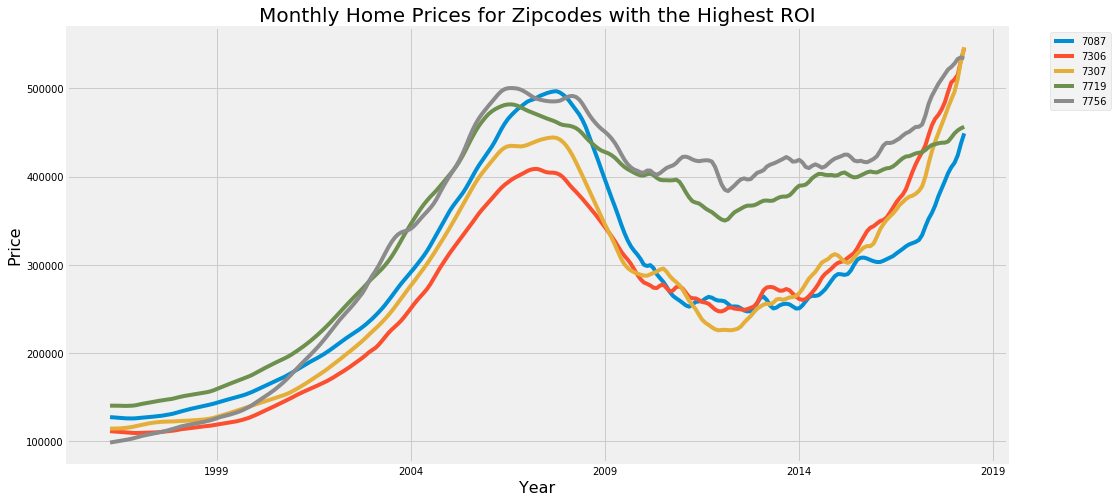

In [18]:
plt.figure(figsize=(14,6))
for zipcode in NJ_top_5.RegionName.unique():
    nj = NJ_top_5[NJ_top_5.RegionName == zipcode]
    nj['value'].plot(figsize=(15,8), label=zipcode)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xlabel("Year", fontsize=16)
plt.ylabel("Price", fontsize=16)
plt.title("Monthly Home Prices for Zipcodes with the Highest ROI", fontsize=20);

In [19]:
p = d = q = range(0,2)
from itertools import product
pdq = list(itertools.product(p,d,q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [20]:
# source: 
# https://github.com/lraichik/Predicting-average-real-estate-prices-by-zipcode/blob/master/Chicago.ipynb
# finding the model for the test period of 6 months to check if the model can predict correctly
test_period = 6
aic_params = []
for zipcode in NJ_top_5.RegionName.unique():
    ans = []
    for param in pdq:
        for param_seasonal in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(NJ_top_5.loc[NJ_top_5['RegionName'] == zipcode][:-test_period].value,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results_top = mod.fit()
                ans.append([zipcode, param, param_seasonal, results_top.aic])
    #             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_top.aic))
            except:
                continue
    aic_params.append(sorted(ans, key=lambda x: x[3])[0])

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/lea

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/lea

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/lea

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/lea

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/lea

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/lea

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Volumes/Data/Users/jucabrera/anaconda3/envs/lea

In [21]:
aic_params

[[7087, (1, 1, 1), (1, 1, 1, 12), 4038.3986490229304],
 [7306, (1, 1, 1), (1, 1, 1, 12), 3964.26201011944],
 [7307, (1, 1, 1), (1, 1, 1, 12), 3937.0612933354814],
 [7719, (1, 1, 1), (1, 1, 1, 12), 3837.3690309199064],
 [7756, (1, 1, 1), (1, 1, 1, 12), 4059.4014527964214]]

In [22]:
# this is for the whole data set
# run this cell two time, now with test period and then again with the whole dataset
models = []
for i in aic_params:
    df_ = NJ_top_5.loc[NJ_top_5['RegionName'] == i[0]][:-test_period].value.dropna()
    mod = sm.tsa.statespace.SARIMAX(df_,
                            order=i[1],
                            seasonal_order=i[2],
                            enforce_stationarity=False,
                            enforce_invertibility=False,)

    top_results = mod.fit()
    models.append(top_results)
    print(i[0], '\n' , top_results.summary().tables[1])

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7087 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8403      0.038     21.944      0.000       0.765       0.915
ma.L1          0.6582      0.045     14.468      0.000       0.569       0.747
ar.S.L12       0.2003      0.062      3.233      0.001       0.079       0.322
ma.S.L12      -0.5518      0.048    -11.556      0.000      -0.645      -0.458
sigma2      2.152e+06   1.55e+05     13.914      0.000    1.85e+06    2.46e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7306 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7744      0.044     17.472      0.000       0.688       0.861
ma.L1          0.7855      0.043     18.233      0.000       0.701       0.870
ar.S.L12       0.1294      0.049      2.654      0.008       0.034       0.225
ma.S.L12      -0.4893      0.039    -12.453      0.000      -0.566      -0.412
sigma2      1.738e+06   1.56e+05     11.155      0.000    1.43e+06    2.04e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7307 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9416      0.019     49.206      0.000       0.904       0.979
ma.L1          0.3372      0.014     24.890      0.000       0.311       0.364
ar.S.L12      -0.7331      0.033    -22.304      0.000      -0.798      -0.669
ma.S.L12      -0.0350      0.024     -1.433      0.152      -0.083       0.013
sigma2      1.245e+06   7.88e+04     15.791      0.000    1.09e+06     1.4e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7719 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8424      0.047     17.841      0.000       0.750       0.935
ma.L1          0.5856      0.052     11.262      0.000       0.484       0.688
ar.S.L12       0.1615      0.099      1.624      0.104      -0.033       0.356
ma.S.L12      -0.5859      0.079     -7.405      0.000      -0.741      -0.431
sigma2      9.459e+05   8.22e+04     11.512      0.000    7.85e+05    1.11e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7756 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7622      0.037     20.510      0.000       0.689       0.835
ma.L1          0.7808      0.026     30.013      0.000       0.730       0.832
ar.S.L12       0.1442      0.043      3.359      0.001       0.060       0.228
ma.S.L12      -0.6302      0.028    -22.851      0.000      -0.684      -0.576
sigma2      1.858e+06   1.14e+05     16.273      0.000    1.63e+06    2.08e+06


In [22]:
# this stays for later on for the final model
# for i, zipcode in zip(models, aic_params):
#     print(zipcode[0])
#     i.plot_diagnostics(figsize=(16,8))
#     plt.show()

In [23]:
predictions = []
# pred_conf = []
for i in models:
    prediction_nj = i.forecast(steps=test_period)
#     prediction_nj = i.get_prediction(start = pd.to_datetime('2015-01-01'), dynamic=False)
#     pred_conf_nj = prediction_nj.conf_int()
    predictions.append(prediction_nj)
#     pred_conf.append(pred_conf_nj)

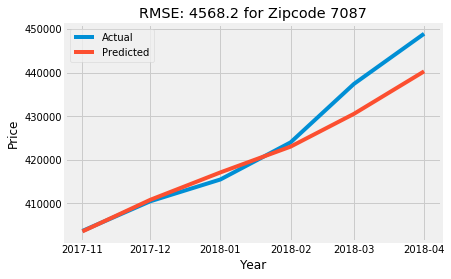

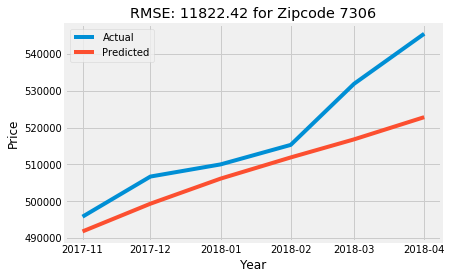

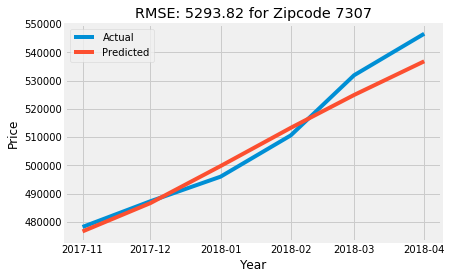

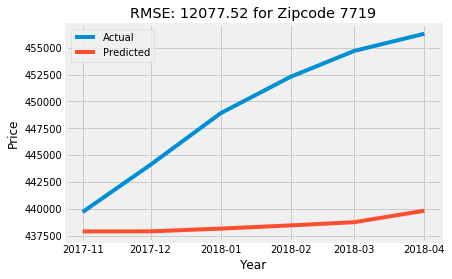

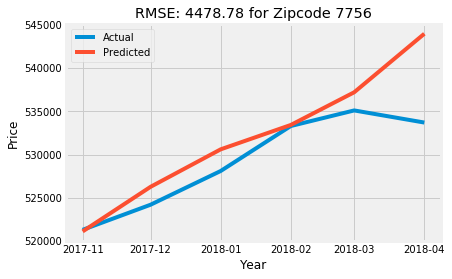

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# trying to show how close your predictions are to the true values
# add legend 
# try shrinking the test period to see if there's a difference
# 
for i,j in zip(predictions,NJ_top_5.RegionName.unique()):
    plt.plot(NJ_top_5[NJ_top_5.RegionName==j].value[-test_period:]) #true vs. perdicted
    plt.plot(i)
    plt.xlabel("Year")
    plt.ylabel("Price")
    plt.title('RMSE: ' + str(round(np.sqrt(mean_squared_error(NJ_top_5[NJ_top_5.RegionName==j].value[-test_period:], i)),2)) + ' for Zipcode ' +  str(j)) 
    plt.legend(['Actual', 'Predicted'])
    plt.show()
# title function has to be string
# create a list for the RMSE and MAE to reference for later
# the model is trained on this so it's expected to fit well
# the model I'm creating did not see the test period so it could had the model for the
# whole data

In [25]:
# train a model a on all the data
final_models = []
for i in aic_params:
    df_ = NJ_top_5.loc[NJ_top_5['RegionName'] == i[0]].value.dropna()
    mod = sm.tsa.statespace.SARIMAX(df_,
                            order=i[1],
                            seasonal_order=i[2],
                            enforce_stationarity=False,
                            enforce_invertibility=False,)

    top_results = mod.fit()
    final_models.append(top_results)
    print(i[0], '\n' , top_results.summary().tables[1])

/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7087 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8282      0.037     22.542      0.000       0.756       0.900
ma.L1          0.6684      0.045     14.945      0.000       0.581       0.756
ar.S.L12       0.1974      0.061      3.211      0.001       0.077       0.318
ma.S.L12      -0.5389      0.047    -11.359      0.000      -0.632      -0.446
sigma2      2.265e+06   1.63e+05     13.917      0.000    1.95e+06    2.58e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7306 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6621      0.037     17.930      0.000       0.590       0.734
ma.L1          0.7904      0.035     22.700      0.000       0.722       0.859
ar.S.L12       0.1386      0.068      2.034      0.042       0.005       0.272
ma.S.L12      -0.4127      0.062     -6.681      0.000      -0.534      -0.292
sigma2       2.46e+06   1.34e+05     18.333      0.000     2.2e+06    2.72e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7307 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9100      0.029     31.348      0.000       0.853       0.967
ma.L1          0.3009      0.025     12.228      0.000       0.253       0.349
ar.S.L12      -0.7089      0.055    -12.819      0.000      -0.817      -0.601
ma.S.L12      -0.0251      0.044     -0.571      0.568      -0.111       0.061
sigma2      2.699e+06   1.61e+05     16.727      0.000    2.38e+06    3.02e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7719 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8359      0.048     17.596      0.000       0.743       0.929
ma.L1          0.5969      0.051     11.718      0.000       0.497       0.697
ar.S.L12       0.1590      0.098      1.623      0.105      -0.033       0.351
ma.S.L12      -0.5789      0.077     -7.494      0.000      -0.730      -0.428
sigma2      9.597e+05   8.28e+04     11.594      0.000    7.97e+05    1.12e+06


/Volumes/Data/Users/jucabrera/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


7756 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7875      0.048     16.431      0.000       0.694       0.881
ma.L1          0.4801      0.031     15.488      0.000       0.419       0.541
ar.S.L12      -0.4304      0.069     -6.282      0.000      -0.565      -0.296
ma.S.L12      -0.1365      0.037     -3.729      0.000      -0.208      -0.065
sigma2      3.358e+06   2.51e+05     13.377      0.000    2.87e+06    3.85e+06


7087


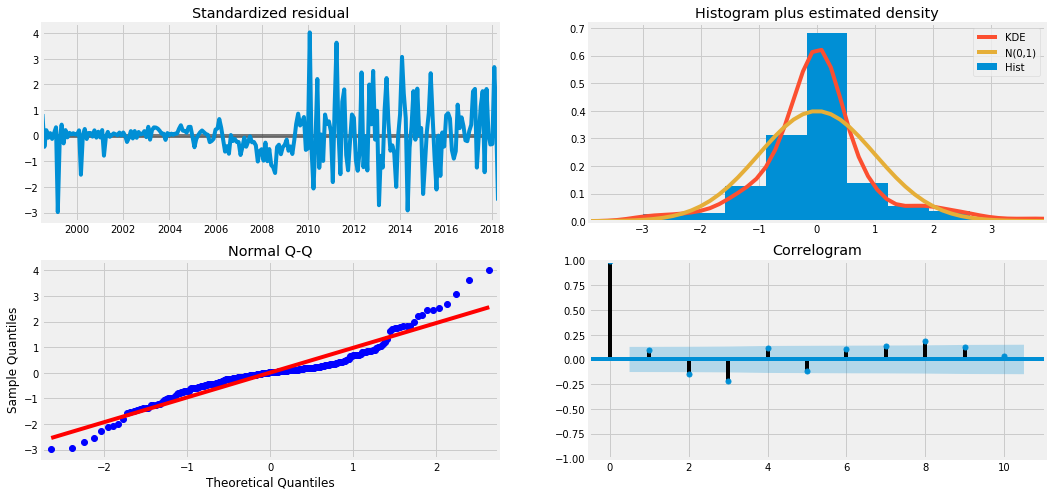

7306


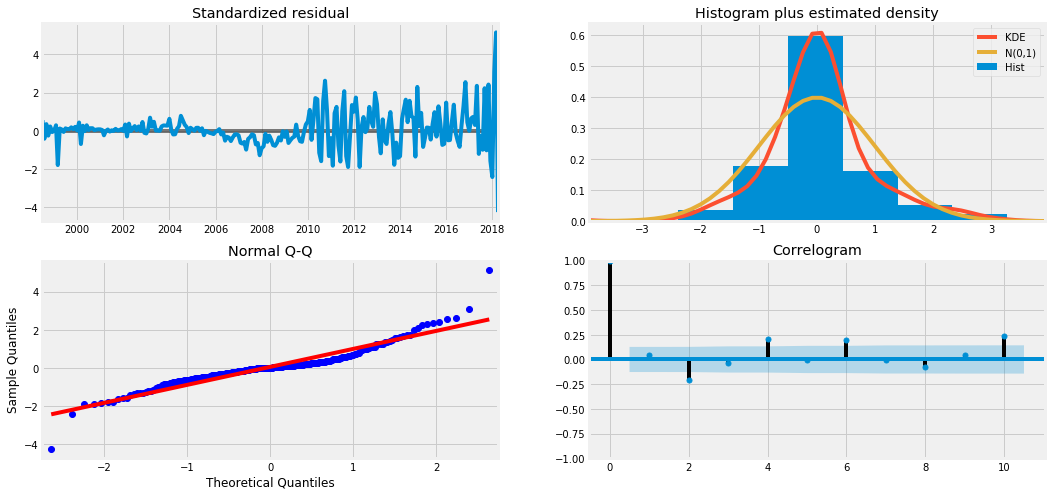

7307


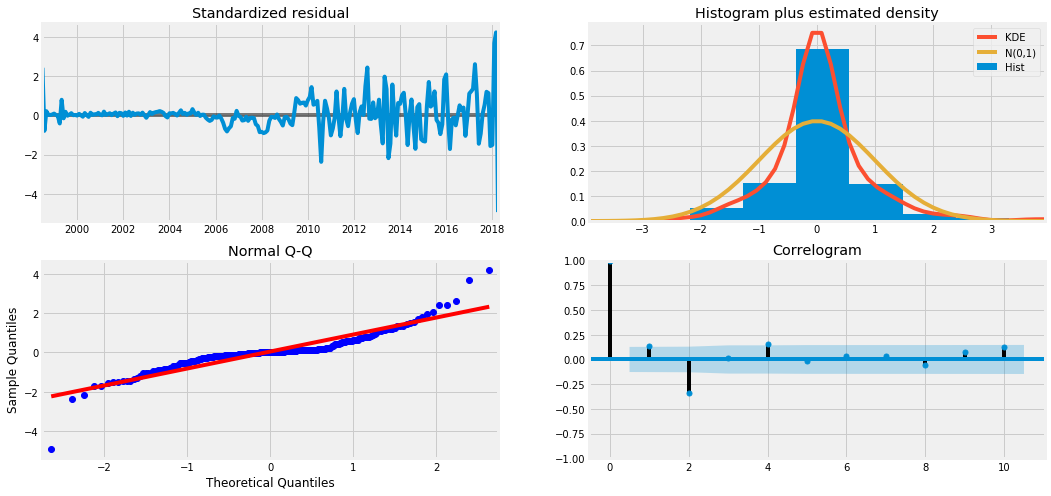

7719


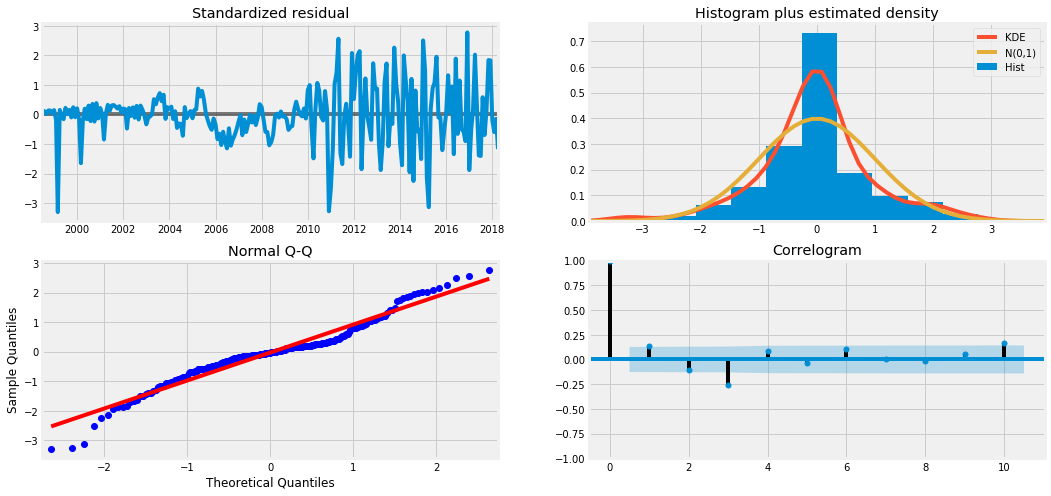

7756


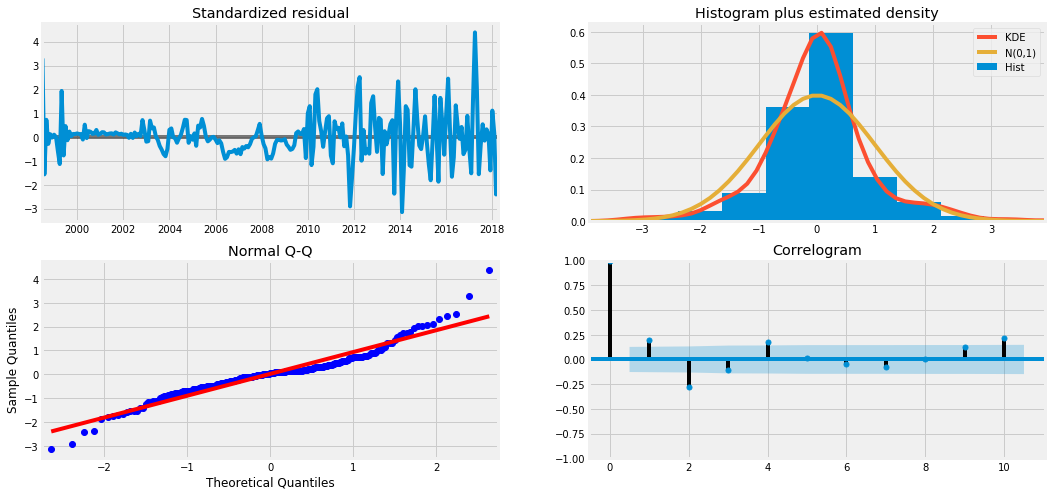

In [26]:
for i, zipcode in zip(final_models, aic_params):
    print(zipcode[0])
    i.plot_diagnostics(figsize=(16,8))
    plt.show()

In [27]:
# 6 months forecast
forecast_6mon = []
intervals_6mon = []
for i in final_models:
    prediction_nj_ny6 = i.get_forecast(steps=6)
    pred_conf_nj_ny6 = prediction_nj_ny6.conf_int()
    forecast_6mon.append(prediction_nj_ny6)
    intervals_6mon.append(pred_conf_nj_ny6)

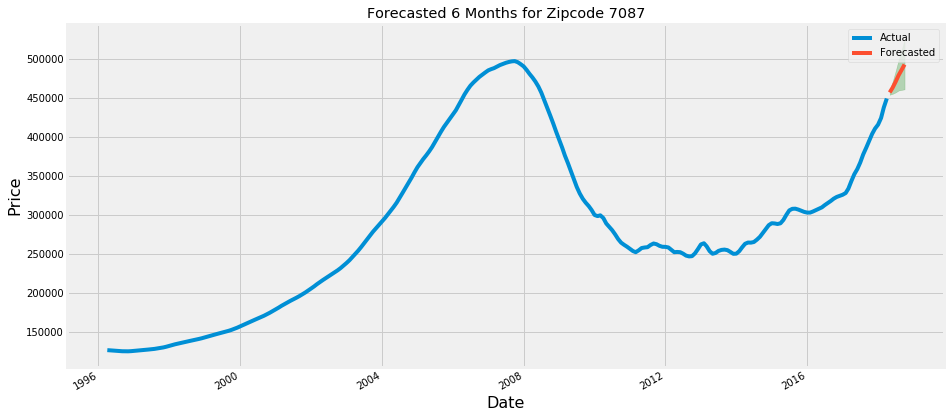

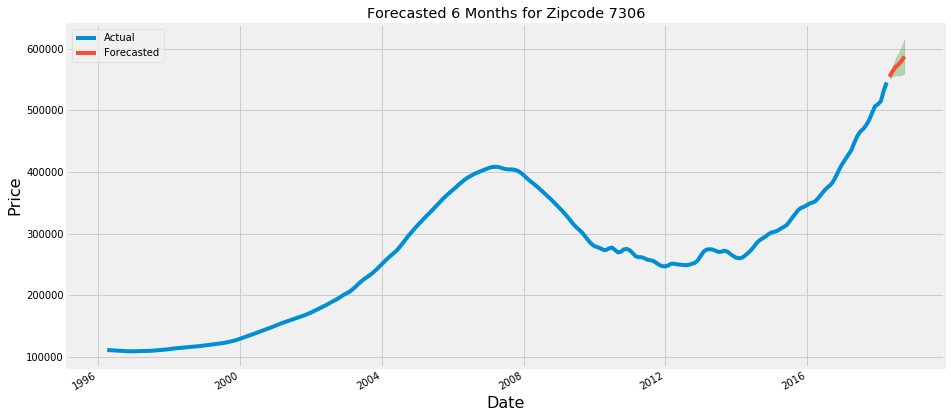

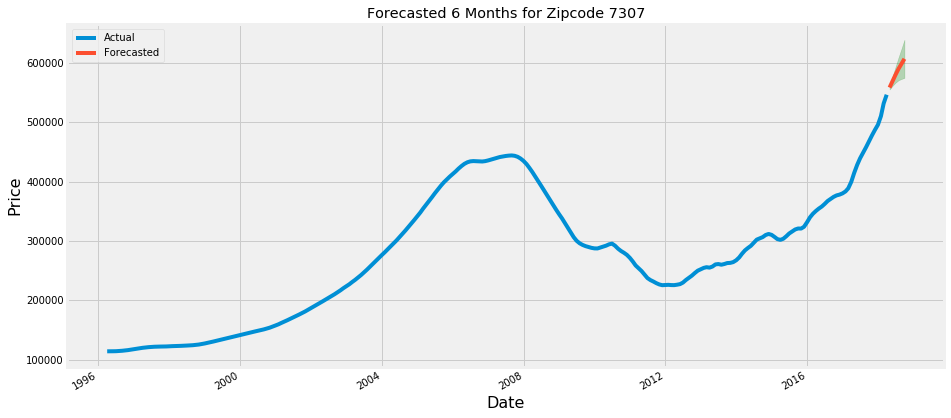

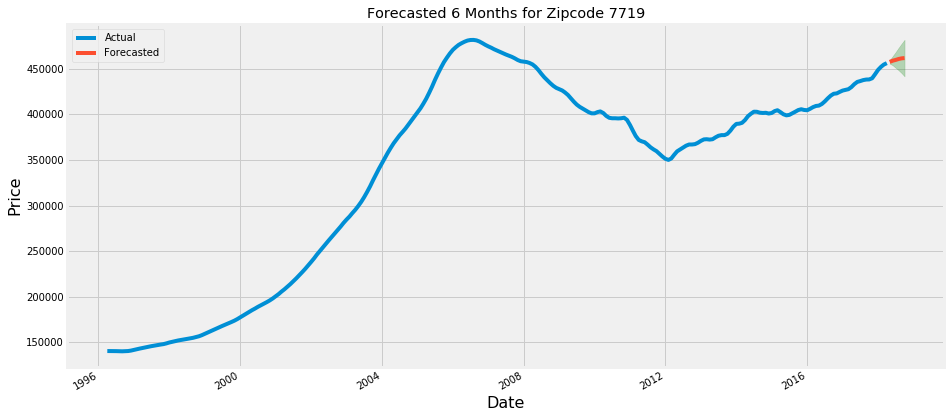

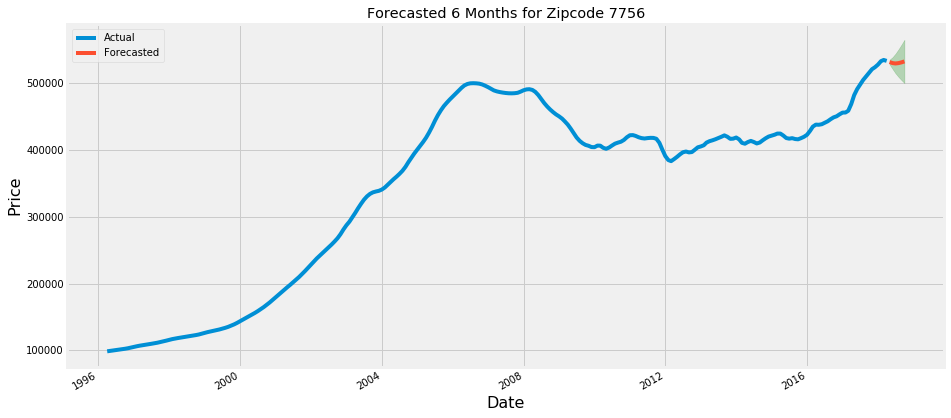

In [28]:
for i,j,k in zip(forecast_6mon,intervals_6mon,NJ_top_5.RegionName.unique()):
    plt.plot(NJ_top_5[NJ_top_5.RegionName==k].value)
    i.predicted_mean.plot(figsize=(14,7))
    plt.fill_between(j.index,
                   j.iloc[:, 0],
                   j.iloc[:, 1], color = 'g', alpha=.25)
    plt.legend(['Actual', 'Forecasted'])
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title('Forecasted 6 Months for Zipcode ' + str(k))
    plt.show()

In [29]:
# 1 year forecast
forecast_1y = []
intervals_1y = []
for i in final_models:
    prediction_nj_ny1 = i.get_forecast(steps=12)
    pred_conf_nj_ny1 = prediction_nj_ny1.conf_int()
    forecast_1y.append(prediction_nj_ny1)
    intervals_1y.append(pred_conf_nj_ny1)

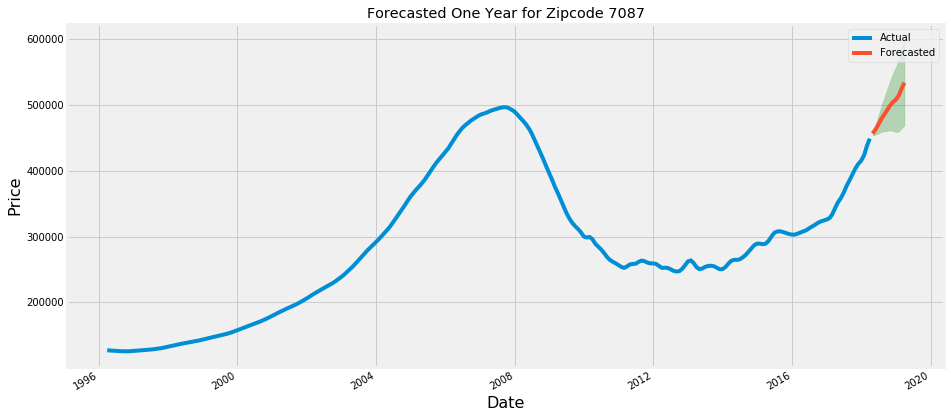

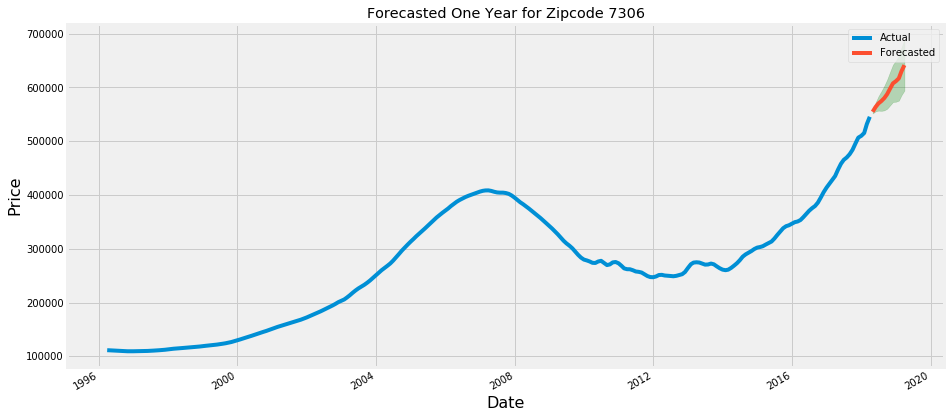

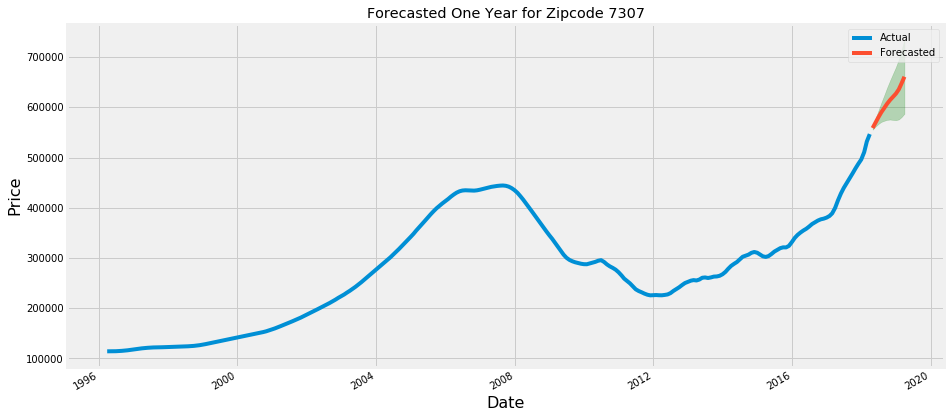

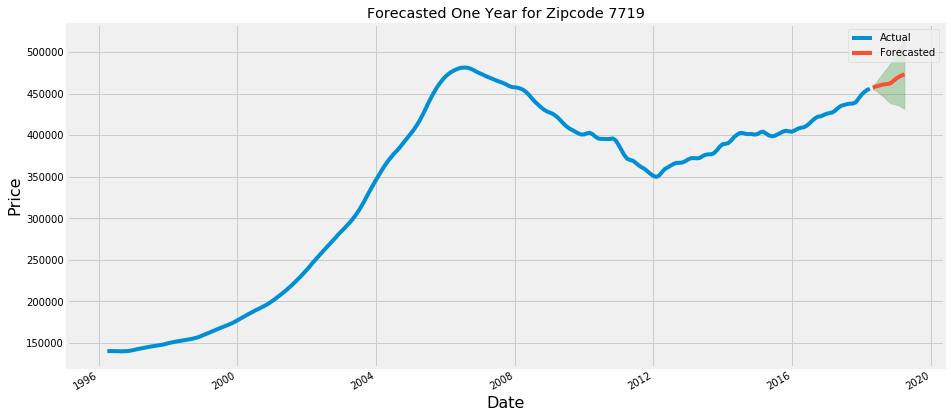

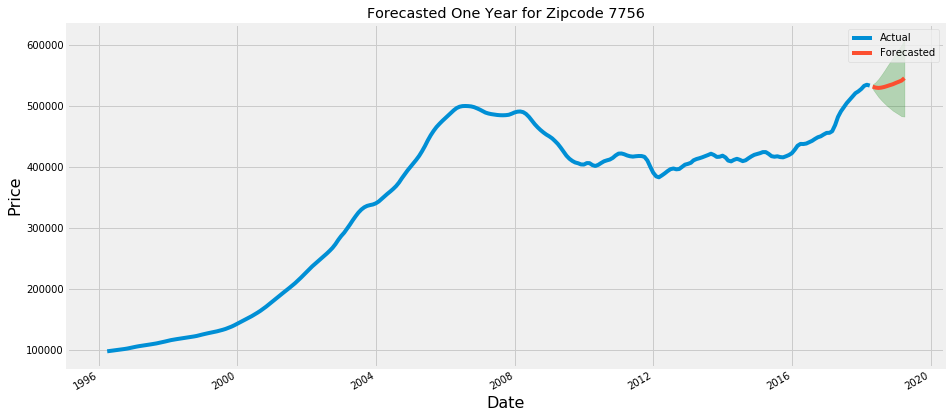

In [132]:
for i,j,k in zip(forecast_1y,intervals_1y,NJ_top_5.RegionName.unique()):
    plt.plot(NJ_top_5[NJ_top_5.RegionName==k].value)
    i.predicted_mean.plot(figsize=(14,7))
    plt.fill_between(j.index,
                   j.iloc[:, 0],
                   j.iloc[:, 1], color = 'g', alpha=.25)
    plt.legend(['Actual', 'Forecasted'])
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title('Forecasted One Year for Zipcode ' + str(k))
    plt.show()

In [30]:
# 5 year forecast
forecast_5y = []
intervals_5y = []
for i in final_models:
    prediction_nj_ny5 = i.get_forecast(steps=60)
    pred_conf_nj_ny5 = prediction_nj_ny5.conf_int()
    forecast_5y.append(prediction_nj_ny5)
    intervals_5y.append(pred_conf_nj_ny5)

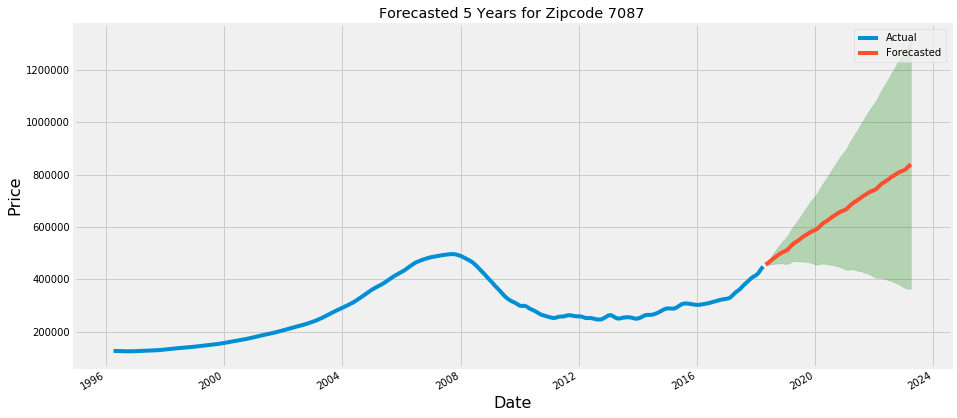

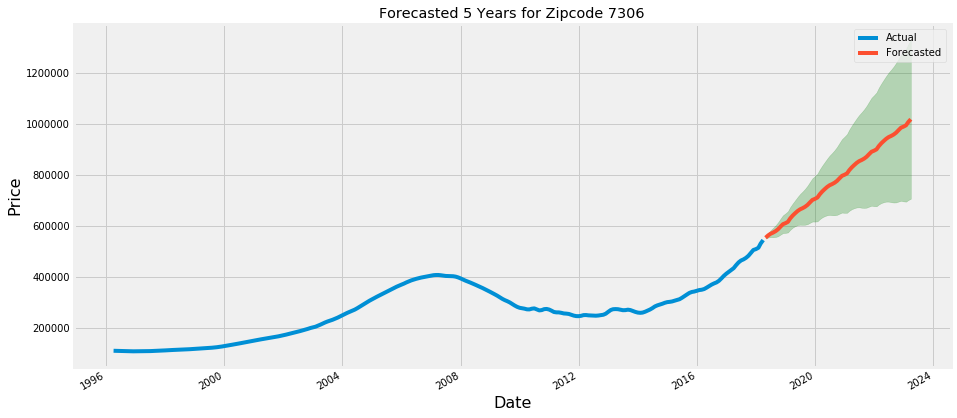

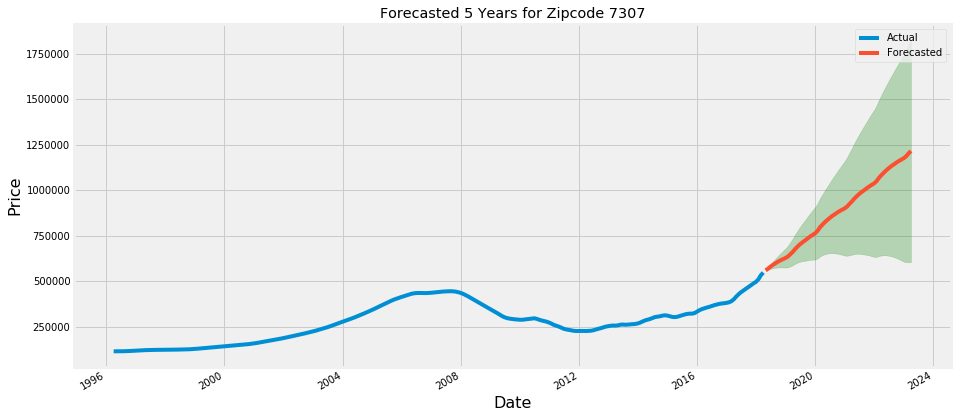

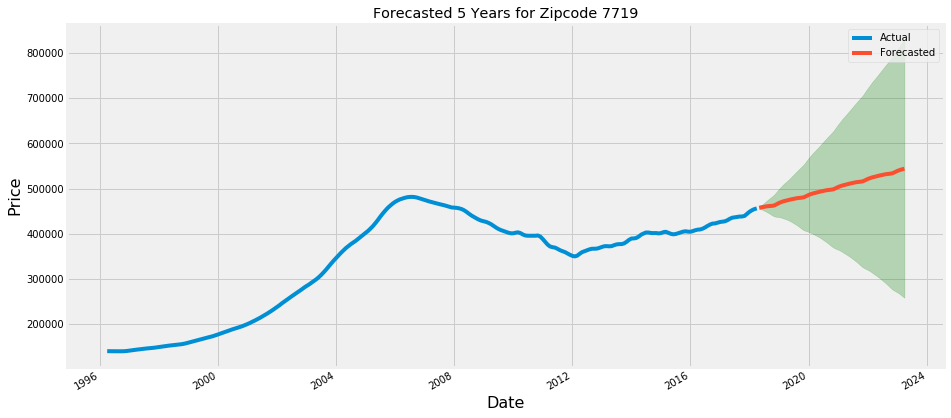

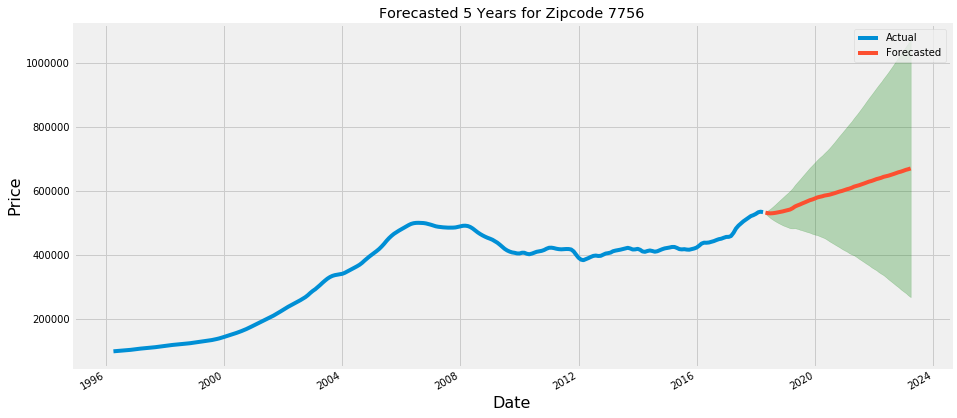

In [31]:
for i,j,k in zip(forecast_5y,intervals_5y,NJ_top_5.RegionName.unique()):
    plt.plot(NJ_top_5[NJ_top_5.RegionName==k].value)
    i.predicted_mean.plot(figsize=(14,7))
    plt.fill_between(j.index,
                   j.iloc[:, 0],
                   j.iloc[:, 1], color = 'g', alpha=.25)
    plt.legend(['Actual', 'Forecasted'])
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title('Forecasted 5 Years for Zipcode ' + str(k))
    plt.show()

In [32]:
# 10 years forecast
forecast_10y = []
intervals_10y = []
for i in final_models:
    prediction_nj_ny10 = i.get_forecast(steps=120)
    pred_conf_nj_ny10 = prediction_nj_ny10.conf_int()
    forecast_10y.append(prediction_nj_ny10)
    intervals_10y.append(pred_conf_nj_ny10)

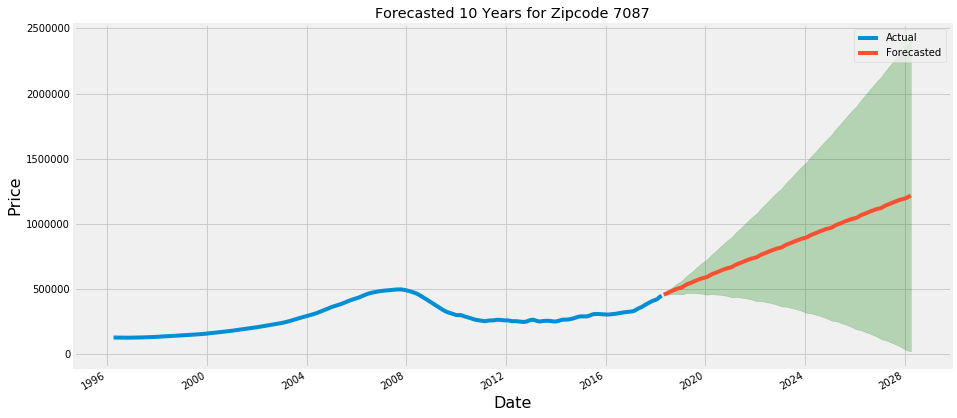

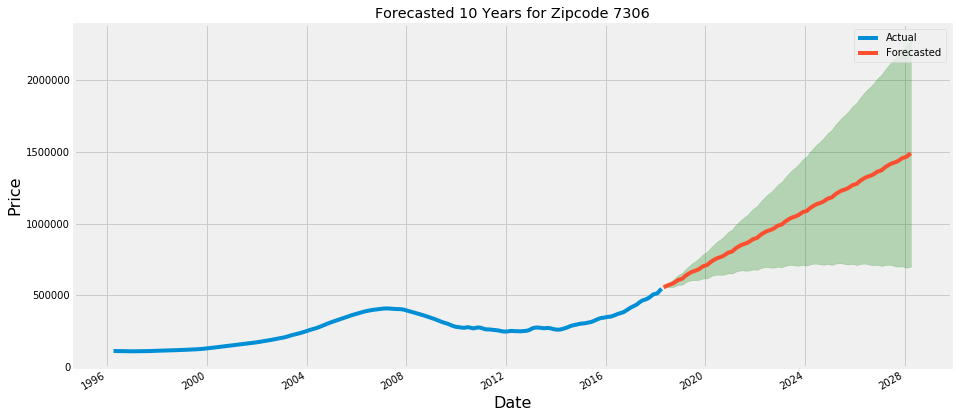

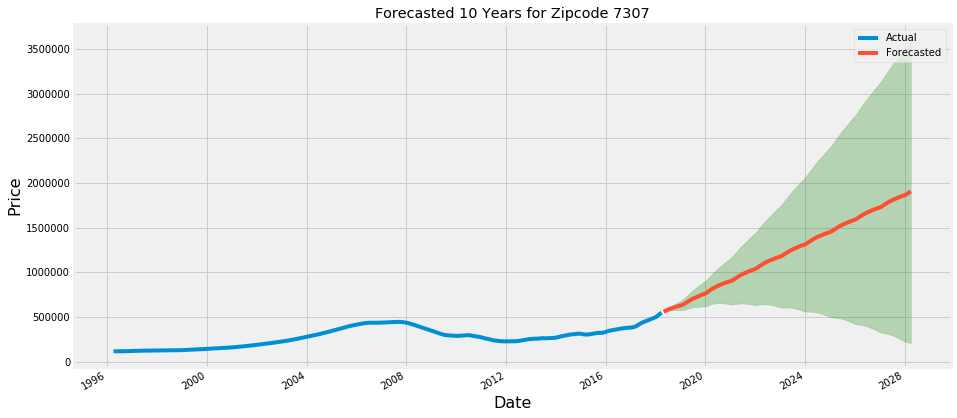

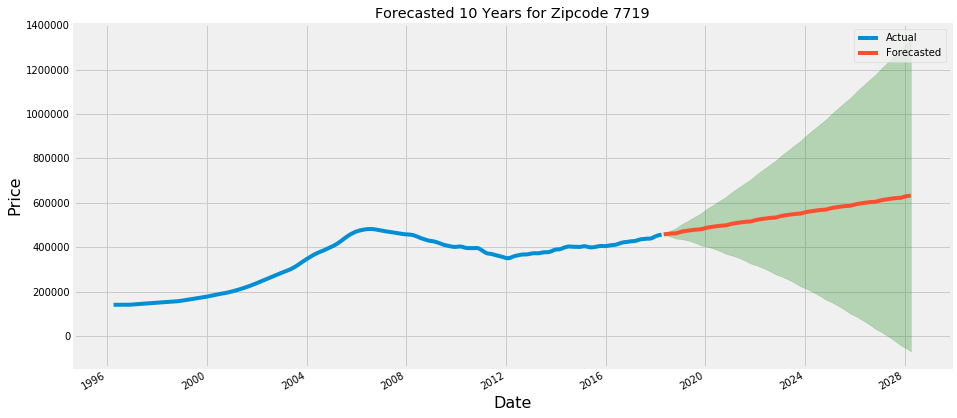

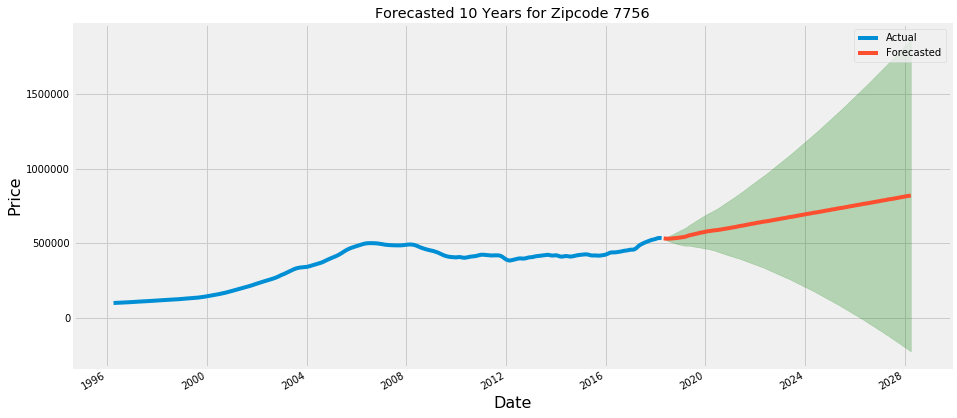

In [110]:
for i,j,k in zip(forecast_10y,intervals_10y,NJ_top_5.RegionName.unique()):
    plt.plot(NJ_top_5[NJ_top_5.RegionName==k].value)
    i.predicted_mean.plot(figsize=(14,7))
    plt.fill_between(j.index,
                   j.iloc[:, 0],
                   j.iloc[:, 1], color = 'g', alpha=.25)
    plt.legend(['Actual', 'Forecasted'])
    plt.xlabel("Year", fontsize=16)
    plt.ylabel("Price", fontsize=16)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title('Forecasted 10 Years for Zipcode ' + str(k))
    plt.show()

In [40]:
forecasted_values_6mons = []
forecasted_values_1yr = []
forecasted_values_5yrs = []
forecasted_values_10yrs = []
for i,j,k,l in zip(forecast_6mon, forecast_1y, forecast_5y, forecast_10y):
    values6 = i.predicted_mean
    values1 = j.predicted_mean
    values5 = k.predicted_mean
    values10 = l.predicted_mean
    forecasted_values_6mons.append(values6)
    forecasted_values_1yr.append(values1)
    forecasted_values_5yrs.append(values5)
    forecasted_values_10yrs.append(values10)

Making df's for each forecasted value - goal is to be able to get ROI for the different time periods

In [41]:
# how to calculate return on investment source:
# https://www.investopedia.com/terms/r/returnoninvestment.asp
# roi = (current listing - previous listing)/previous listing

# avg_ny_metro['ROI'] = ((avg_ny_metro['2018-04']-avg_ny_metro['1996-04'])/avg_ny_metro['1996-04'])

def roi(current, previous):
    roi = ((current - previous)/previous)*100
    return round(roi,2)

In [42]:
# 6 months
six_07087 = pd.DataFrame(forecasted_values_6mons[0], columns=['6mon'])
six_07306 = pd.DataFrame(forecasted_values_6mons[1], columns=['6mon'])
six_07307 = pd.DataFrame(forecasted_values_6mons[2], columns=['6mon'])
six_07719 = pd.DataFrame(forecasted_values_6mons[3], columns=['6mon'])
six_07756 = pd.DataFrame(forecasted_values_6mons[4], columns=['6mon'])

In [43]:
six_months = pd.concat([six_07087, six_07306, six_07307, six_07719, six_07756], axis=1)

In [44]:
six_months.columns = ['07087', '07306', '07307', '07719', '07756']

In [45]:
six_months

,07087,07306,07307,07719,07756
2018-05-01,456630.636072,554762.699890,558680.112059,457647.308841,531995.632515
2018-06-01,462931.122134,563645.283205,569605.580049,458998.676193,530424.475188
2018-07-01,470316.475742,570262.224999,580094.412534,459808.809346,529867.645009
2018-08-01,478707.929401,574733.264711,590178.387850,460864.486479,530403.844014
2018-09-01,485529.423353,580273.519540,598706.900263,461547.922435,531512.564561
2018-10-01,492331.054613,587582.915490,607088.687746,461885.153621,532950.752400


In [46]:
print('07087', roi(six_months['07087'][-1], NJ_top_5[NJ_top_5['RegionName']==7087].value[-1]))
print('07306', roi(six_months['07306'][-1], NJ_top_5[NJ_top_5['RegionName']==7306].value[-1]))
print('07307', roi(six_months['07307'][-1], NJ_top_5[NJ_top_5['RegionName']==7307].value[-1]))
print('07719', roi(six_months['07719'][-1], NJ_top_5[NJ_top_5['RegionName']==7719].value[-1]))
print('07756', roi(six_months['07756'][-1], NJ_top_5[NJ_top_5['RegionName']==7756].value[-1]))

9.67
7.71
11.07
1.22
-0.14


In [47]:
# 1 year
one_07087 = pd.DataFrame(forecasted_values_1yr[0], columns=['1year'])
one_07306 = pd.DataFrame(forecasted_values_1yr[1], columns=['1year'])
one_07307 = pd.DataFrame(forecasted_values_1yr[2], columns=['1year'])
one_07719 = pd.DataFrame(forecasted_values_1yr[3], columns=['1year'])
one_07756 = pd.DataFrame(forecasted_values_1yr[4], columns=['1year'])

In [48]:
one_year = pd.concat([one_07087, one_07306, one_07307, one_07719, one_07756], axis=1)

In [49]:
one_year.columns = ['07087', '07306', '07307', '07719', '07756']

In [50]:
print('07087', roi(one_year['07087'][-1], NJ_top_5[NJ_top_5['RegionName']==7087].value[-1]))
print('07306', roi(one_year['07306'][-1], NJ_top_5[NJ_top_5['RegionName']==7306].value[-1]))
print('07307', roi(one_year['07307'][-1], NJ_top_5[NJ_top_5['RegionName']==7307].value[-1]))
print('07719', roi(one_year['07719'][-1], NJ_top_5[NJ_top_5['RegionName']==7719].value[-1]))
print('07756', roi(one_year['07756'][-1], NJ_top_5[NJ_top_5['RegionName']==7756].value[-1]))

18.94
17.61
20.89
3.79
2.28


In [51]:
# 5 years
five_07087 = pd.DataFrame(forecasted_values_5yrs[0], columns=['5year'])
five_07306 = pd.DataFrame(forecasted_values_5yrs[1], columns=['5year'])
five_07307 = pd.DataFrame(forecasted_values_5yrs[2], columns=['5year'])
five_07719 = pd.DataFrame(forecasted_values_5yrs[3], columns=['5year'])
five_07756 = pd.DataFrame(forecasted_values_5yrs[4], columns=['5year'])

In [52]:
five_year = pd.concat([five_07087, five_07306, five_07307, five_07719, five_07756], axis=1)

In [53]:
five_year.columns = ['07087', '07306', '07307', '07719', '07756']

In [54]:
print('07087:', roi(five_year['07087'][-1], NJ_top_5[NJ_top_5['RegionName']==7087].value[-1]))
print('07306:', roi(five_year['07306'][-1], NJ_top_5[NJ_top_5['RegionName']==7306].value[-1]))
print('07307:', roi(five_year['07307'][-1], NJ_top_5[NJ_top_5['RegionName']==7307].value[-1]))
print('07719:', roi(five_year['07719'][-1], NJ_top_5[NJ_top_5['RegionName']==7719].value[-1]))
print('07756:', roi(five_year['07756'][-1], NJ_top_5[NJ_top_5['RegionName']==7756].value[-1]))

86.93
86.85
122.25
19.24
25.6


In [55]:
# 10 years
ten_07087 = pd.DataFrame(forecasted_values_10yrs[0], columns=['10year'])
ten_07306 = pd.DataFrame(forecasted_values_10yrs[1], columns=['10year'])
ten_07307 = pd.DataFrame(forecasted_values_10yrs[2], columns=['10year'])
ten_07719 = pd.DataFrame(forecasted_values_10yrs[3], columns=['10year'])
ten_07756 = pd.DataFrame(forecasted_values_10yrs[4], columns=['10year'])

In [56]:
ten_year = pd.concat([ten_07087, ten_07306, ten_07307, ten_07719, ten_07756], axis=1)

In [57]:
ten_year.columns = ['07087', '07306', '07307', '07719', '07756']

In [58]:
print('07087:', roi(ten_year['07087'][-1], NJ_top_5[NJ_top_5['RegionName']==7087].value[-1]))
print('07306:', roi(ten_year['07306'][-1], NJ_top_5[NJ_top_5['RegionName']==7306].value[-1]))
print('07307:', roi(ten_year['07307'][-1], NJ_top_5[NJ_top_5['RegionName']==7307].value[-1]))
print('07719:', roi(ten_year['07719'][-1], NJ_top_5[NJ_top_5['RegionName']==7719].value[-1]))
print('07756:', roi(ten_year['07756'][-1], NJ_top_5[NJ_top_5['RegionName']==7756].value[-1]))

171.13
173.35
248.66
38.65
53.59


In [59]:
# source: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
forecast_data = {'Zipcode':['07087', '07306', '07307', '07719', '07756'], 
                 '6 Months ROI %':[9.67, 7.71, 11.07, 1.22, -0.14],
                '1 Year ROI %':[18.94, 17.61, 20.89, 3.79, 2.28],
                '5 Year ROI %':[86.93, 86.85, 122.25, 19.24, 25.6],
                '10 Year ROI %':[171.13, 173.35, 248.66, 38.65, 53.59]}
forecast_df = pd.DataFrame(forecast_data)

In [60]:
forecast_df

,Zipcode,6 Months ROI %,1 Year ROI %,5 Year ROI %,10 Year ROI %
0,07087,9.67,18.94,86.93,171.13
1,07306,7.71,17.61,86.85,173.35
2,07307,11.07,20.89,122.25,248.66
3,07719,1.22,3.79,19.24,38.65
4,07756,-0.14,2.28,25.60,53.59
